In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [107]:
bikes=pd.read_csv('hour.csv')

In [108]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [109]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  demand      17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [110]:
data=bikes.copy()

In [111]:
data.drop(['index','date','casual','registered'],axis=1,inplace=True)

In [112]:
data

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [113]:
###Basic Analysis Of Data

In [114]:
data.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

In [115]:
##data has no missing values

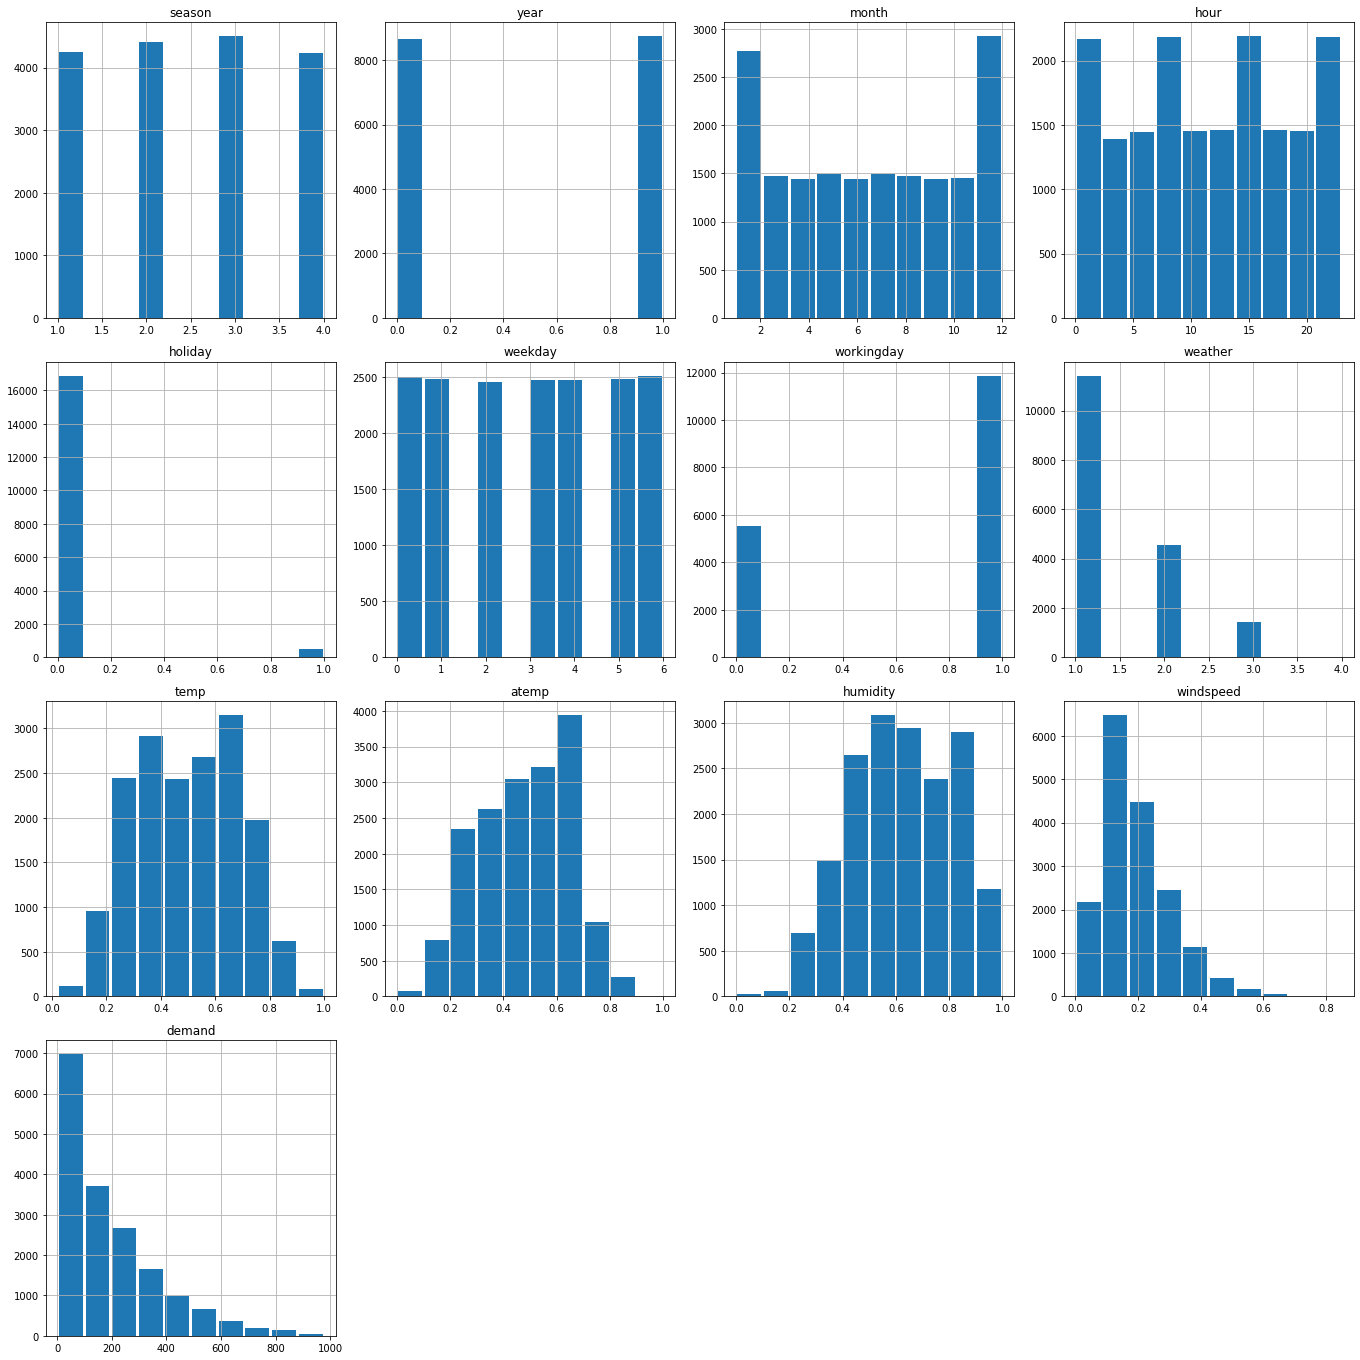

In [116]:
data.hist(rwidth=0.9,figsize=(19,19))
plt.tight_layout()

In [117]:
### predicted variable demand is not normally distributes

In [118]:
##data visulaization of continous variables
## visualies features vs demand

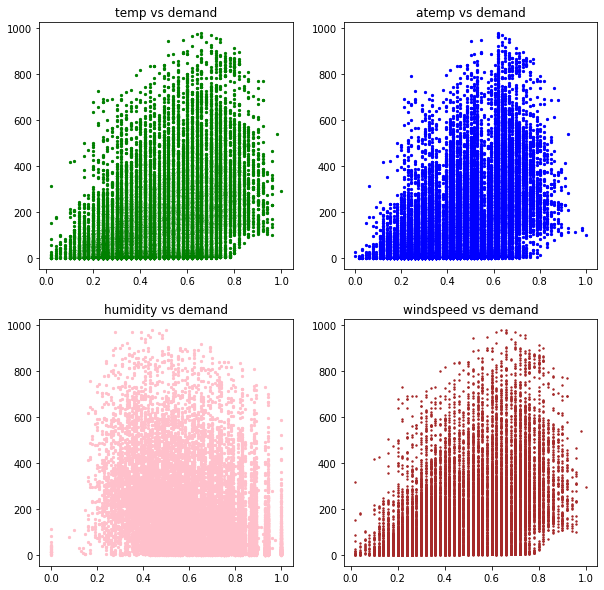

In [119]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('temp vs demand')
plt.scatter(data.temp,data.demand,s=5,c='g')

plt.subplot(2,2,2)
plt.title('atemp vs demand')
plt.scatter(data.atemp,data.demand,s=5,c='b')

plt.subplot(2,2,3)
plt.title('humidity vs demand')
plt.scatter(data.humidity,data.demand,s=5,c='pink')

plt.subplot(2,2,4)
plt.title('windspeed vs demand')
plt.scatter(data.temp,data.demand,s=2,c='brown')

In [120]:
##categorical


In [121]:
list1=data['season'].unique()

In [122]:
average=data.groupby('season').mean()['demand']

/usr/local/lib/python3.9/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, 'season vs demand')

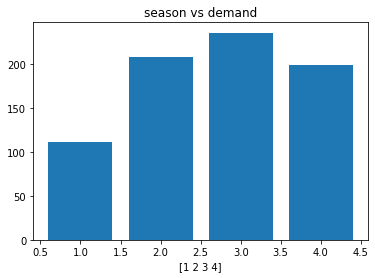

In [123]:
plt.bar(list1,average)
plt.xlabel(data['season'].unique())
plt.title('season vs demand')

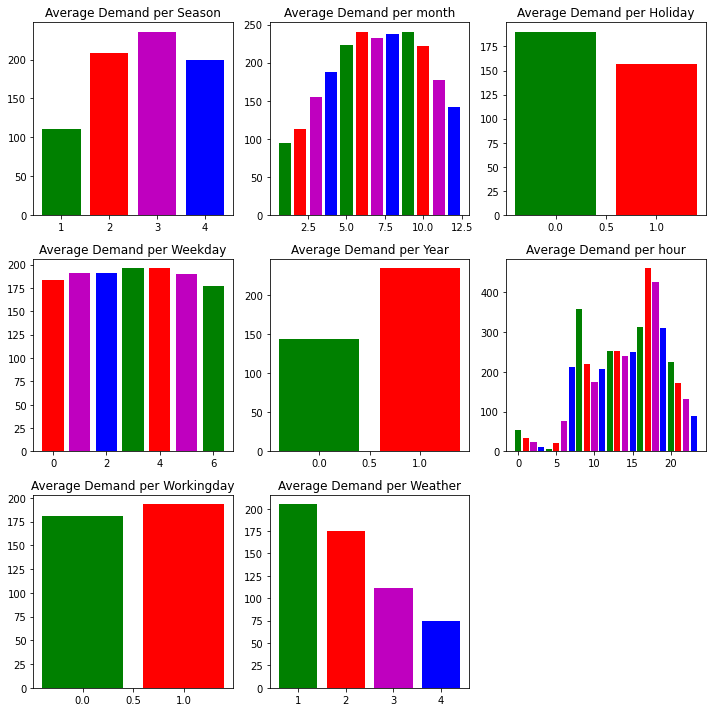

In [124]:
plt.figure(figsize=(10,10))

bikes_prep=data.copy()
colors = ['g', 'r', 'm', 'b']

plt.subplot(3,3,1)
plt.title('Average Demand per Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Average Demand per Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Average Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Average Demand per Workingday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Average Demand per Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()

In [125]:


data.corr(method='spearman')

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
season,1.000000,-0.010713,0.830847,-0.006092,-0.009487,-0.002320,0.013671,-0.013335,0.305753,0.305816,0.147515,-0.136890,0.185179
year,-0.010713,1.000000,-0.010429,-0.003861,0.006692,-0.004493,-0.002196,-0.013168,0.036441,0.035346,-0.083119,-0.010653,0.207500
month,0.830847,-0.010429,1.000000,-0.005737,0.018695,0.010293,-0.003653,0.008614,0.191369,0.190804,0.159684,-0.129945,0.125889
hour,-0.006092,-0.003861,-0.005737,1.000000,0.000477,-0.003497,0.002281,-0.030349,0.133998,0.132986,-0.278530,0.140367,0.510878
holiday,-0.009487,0.006692,0.018695,0.000477,1.000000,-0.101857,-0.252471,-0.012917,-0.028125,-0.031468,-0.012288,0.004141,-0.029526
weekday,-0.002320,-0.004493,0.010293,-0.003497,-0.101857,1.000000,0.035044,0.003277,-0.005724,-0.012979,-0.036598,0.009936,0.030297
workingday,0.013671,-0.002196,-0.003653,0.002281,-0.252471,0.035044,1.000000,0.043875,0.054965,0.054103,0.017325,-0.010723,0.021033
weather,-0.013335,-0.013168,0.008614,-0.030349,-0.012917,0.003277,0.043875,1.000000,-0.104510,-0.111145,0.409364,0.008303,-0.126276
temp,0.305753,0.036441,0.191369,0.133998,-0.028125,-0.005724,0.054965,-0.104510,1.000000,0.989633,-0.055408,-0.009719,0.423330
atemp,0.305816,0.035346,0.190804,0.132986,-0.031468,-0.012979,0.054103,-0.111145,0.989633,1.000000,-0.052617,-0.041091,0.423258


In [126]:
##demand is not normally distributed

#3temperature and demand appears to have direct correlation

#3plot for temp and atemp are almost identical

## humidity and wind speed affect demand but need more statistical analysis

## no change in demand in working days and weekdays

In [127]:
#3 check for outlires

In [128]:
import pandas as pd

# assuming 'data' is a Pandas DataFrame containing the variables of interest
corr_matrix = data[['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()

# print the correlation matrix
print(corr_matrix)


              season      year     month      hour   holiday   weekday  \
season      1.000000 -0.010742  0.830386 -0.006117 -0.009585 -0.002335   
year       -0.010742  1.000000 -0.010473 -0.003867  0.006692 -0.004485   
month       0.830386 -0.010473  1.000000 -0.005772  0.018430  0.010400   
hour       -0.006117 -0.003867 -0.005772  1.000000  0.000479 -0.003498   
holiday    -0.009585  0.006692  0.018430  0.000479  1.000000 -0.102088   
weekday    -0.002335 -0.004485  0.010400 -0.003498 -0.102088  1.000000   
workingday  0.013743 -0.002196 -0.003477  0.002285 -0.252471  0.035955   
weather    -0.014524 -0.019157  0.005400 -0.020203 -0.017036  0.003311   
temp        0.312025  0.040913  0.201691  0.137603 -0.027340 -0.001795   
atemp       0.319380  0.039222  0.208096  0.133750 -0.030973 -0.008821   
humidity    0.150625 -0.083546  0.164411 -0.276498 -0.010588 -0.037158   
windspeed  -0.149773 -0.008740 -0.135386  0.137252  0.003988  0.011502   
demand      0.178056  0.250495  0.1206

In [129]:
data.demand.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [130]:
data.demand.quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='demand'>

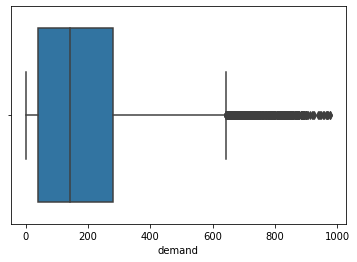

In [131]:
sns.boxplot(data.demand)

In [132]:
correlation=data[['temp','atemp','humidity','windspeed','demand']].corr()

In [133]:
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


In [134]:
## we can drop the atemp and windspped features

In [135]:
data.drop(['atemp','windspeed'],axis=1,inplace=True)

In [136]:
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,demand
0,1,0,1,0,0,6,0,1,0.24,0.81,16
1,1,0,1,1,0,6,0,1,0.22,0.80,40
2,1,0,1,2,0,6,0,1,0.22,0.80,32
3,1,0,1,3,0,6,0,1,0.24,0.75,13
4,1,0,1,4,0,6,0,1,0.24,0.75,1


In [137]:
##auto correlation in demand

In [138]:
df1=pd.to_numeric(data['demand'],downcast='float')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f54f6f4efa0>)

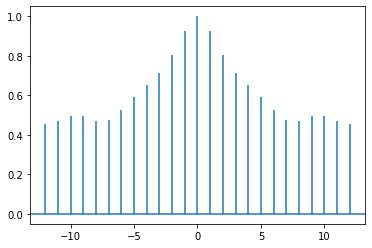

In [139]:
plt.acorr(df1,maxlags=12)

In [140]:
##there is high autocorrelation in demad feature


In [141]:
##demand is not normally distributed

In [142]:
df1=data['demand']
df2=np.log(df1)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

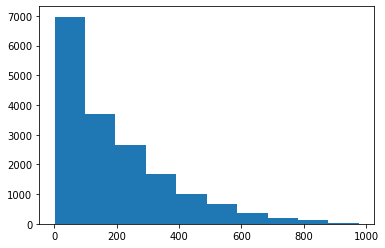

In [143]:
plt.hist(df1)

(array([ 158.,  432.,  925., 1033., 1281., 1598., 2561., 4230., 3780.,
        1381.]),
 array([0.        , 0.68844867, 1.37689733, 2.065346  , 2.75379466,
        3.44224333, 4.13069199, 4.81914066, 5.50758932, 6.19603799,
        6.88448665]),
 <BarContainer object of 10 artists>)

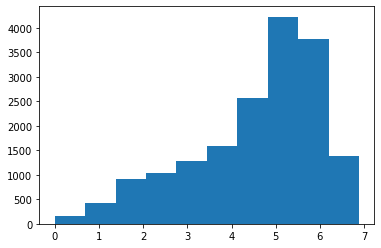

In [144]:
plt.hist(df2)


In [145]:
data['demand']=np.log(data['demand'])

In [146]:
data.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,demand
0,1,0,1,0,0,6,0,1,0.24,0.81,2.772589
1,1,0,1,1,0,6,0,1,0.22,0.80,3.688879
2,1,0,1,2,0,6,0,1,0.22,0.80,3.465736
3,1,0,1,3,0,6,0,1,0.24,0.75,2.564949
4,1,0,1,4,0,6,0,1,0.24,0.75,0.000000


In [151]:

# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = data['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = data['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = data['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

data1 = pd.concat([data, t_1, t_2, t_3], axis=1)

data1 = data1.dropna()


In [152]:
data1.shape

(17376, 14)

In [153]:
data1.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,0,1,3,0,6,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,0,1,4,0,6,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,0,1,5,0,6,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,0,1,6,0,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,0,1,7,0,6,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000


In [156]:
data1.drop(['weekday','workingday'],axis=1,inplace=True)

In [159]:
data1.dtypes


season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [160]:
data1['season']=data1['season'].astype('category')
data1['holiday']=data1['holiday'].astype('category')
data1['weather']=data1['weather'].astype('category')
data1['month']=data1['month'].astype('category')
data1['hour']=data1['hour'].astype('category')



In [162]:
data1=pd.get_dummies(data1,drop_first=True)

In [163]:
data1.shape

(17376, 47)

In [164]:
##demand is a time dependent feature

In [178]:
Y=data1['demand']
X=data1.iloc[:,:-1]
y

3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
           ...   
17374    4.779123
17375    4.488636
17376    4.499810
17377    4.110874
17378    3.891820
Name: demand, Length: 17376, dtype: float64

In [179]:
tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


In [180]:
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)







In [181]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))


# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)


7.185563732094827e-15


In [182]:
print(rmse)

7.573639890782372e-15


In [183]:
print(r2_train)

1.0


In [184]:
print(r2_test)


1.0
